<h2>Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Loading dataset

In [3]:
df=pd.read_csv("C:\\Users\\Keshav\\Downloads\\spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.isnull().sum()#no need for handling missing data

Category    0
Message     0
dtype: int64

<Axes: xlabel='spam', ylabel='count'>

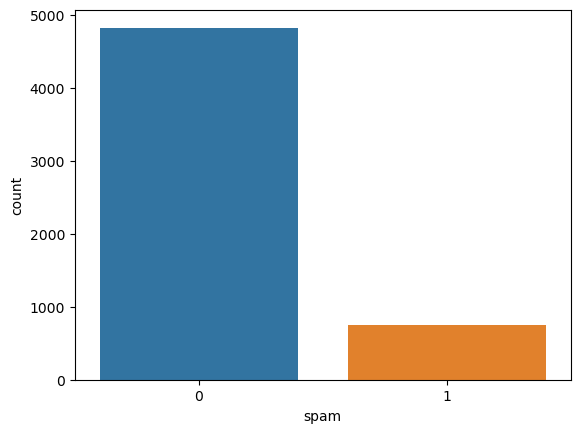

In [6]:
sns.countplot(x=df['spam'])

<h2>EDA

In [8]:
df.groupby("Category").sum()

,Message,spam
Category,,
ham,"Go until jurong point, crazy.. Available only ...",0
spam,Free entry in 2 a wkly comp to win FA Cup fina...,747


In [9]:
df['spam']=df['Category'].apply(lambda x:1 if x=="spam" else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<h2>Splitting data

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.25)

<h2>count vectorizer to convert text data into numerical data

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_count=v.fit_transform(X_train.values)
X_train_count.toarray()[:]
X_train.shape

(4179,)

<h2>Using Multinomial Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [13]:
emails=[
    'Hey mohan, can we get together to watch football game together?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!!'
]
emails_count=v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [34]:
x_test=v.transform(X_test)
y_pred=model.predict(x_test)
y_pred
from sklearn.metrics import precision_score, recall_score

# Precision for class 1 (positive class)
precision = precision_score(y_test, y_pred, pos_label=1)

# Recall for all classes (weighted average)
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision (class 1):", precision)
print("Recall (all classes):", recall)


Precision (class 1): 0.9885714285714285
Recall (all classes): 0.9806173725771715


In [14]:
X_test_count=v.transform(X_test)
model.score(X_test_count,y_test)

0.9806173725771715

<h2>Using Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()

In [16]:
logReg.fit(X_train_count,y_train)

LogisticRegression()

In [30]:
x_test=v.transform(X_test)
y_pred=logReg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
emails=[
    'Hey mohan, can we get together to watch football game together?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!!'
]
emails_count=v.transform(emails)
logReg.predict(emails_count)

array([0, 0], dtype=int64)

In [18]:
logReg.score(X_test_count,y_test)


0.9741564967695621

In [31]:
from sklearn.metrics import precision_score, recall_score

# Precision for class 1 (positive class)
precision = precision_score(y_test, y_pred, pos_label=1)

# Recall for all classes (weighted average)
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision (class 1):", precision)
print("Recall (all classes):", recall)


Precision (class 1): 0.9879518072289156
Recall (all classes): 0.9741564967695621


<h2>Using Gaussian Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
GaussNB=GaussianNB()

In [20]:
GaussNB.fit(X_train_count.toarray(),y_train)

GaussianNB()

In [21]:
emails=[
    'Hey mohan, can we get together to watch football game together?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!!'
]
emails_count=v.transform(emails)
GaussNB.predict(emails_count.toarray())

array([0, 1], dtype=int64)

In [33]:
x_test=v.transform(X_test)
y_pred=GaussNB.predict(x_test.toarray())
y_pred
from sklearn.metrics import precision_score, recall_score

# Precision for class 1 (positive class)
precision = precision_score(y_test, y_pred, pos_label=1)

# Recall for all classes (weighted average)
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision (class 1):", precision)
print("Recall (all classes):", recall)


Precision (class 1): 0.6124567474048442
Recall (all classes): 0.9045226130653267


In [22]:
GaussNB.score(X_test_count.toarray(),y_test)

0.9045226130653267

<h2>Pipeline(an API to perform pre-processing)

In [19]:
from sklearn.pipeline import Pipeline
clfNB=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [20]:
clfNB.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [21]:
clfNB.score(X_test,y_test)

0.9877961234745154

In [22]:
clfNB.predict(emails)

array([0, 1], dtype=int64)

<h1>Conclusion:</h1><br>
<h2>Multinomial Naive bayes performed the best and Gaussian Naive bayes' the worst</h2>